In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [2]:
filename = os.path.expandvars("$SCRATCH/data/qdf_samples/200000000_samples.fits")
data = Table.read(filename, format='fits')

In [3]:
R, vR, vT, z, vz, phi = data['R', 'vR', 'vT', 'z', 'vz', 'phi'].as_array().view((np.float64, 6)).T
phi[phi > np.pi] -= 2*np.pi
del data

In [4]:
mask = (R > 3/8.) & (R < 13/8.) & (phi > -np.pi/18) & (phi < np.pi/18) & (vT > 0.1) & (vT < 1.7)
H1, xedges1, yedges1 = np.histogram2d(R[mask], vT[mask], bins=500)
H1 = H1.T

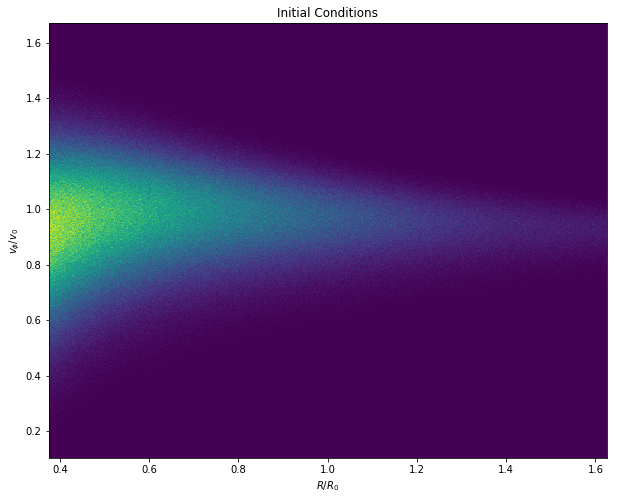

In [5]:
plt.figure(figsize=(10,8))
plt.imshow(H1, origin='low', extent=[xedges1[0], xedges1[-1], yedges1[0], yedges1[-1]], aspect='auto')
plt.xlabel('$R/R_0$')
plt.ylabel('$v_{\phi}/v_0$')
plt.title('Initial Conditions')
plt.show()

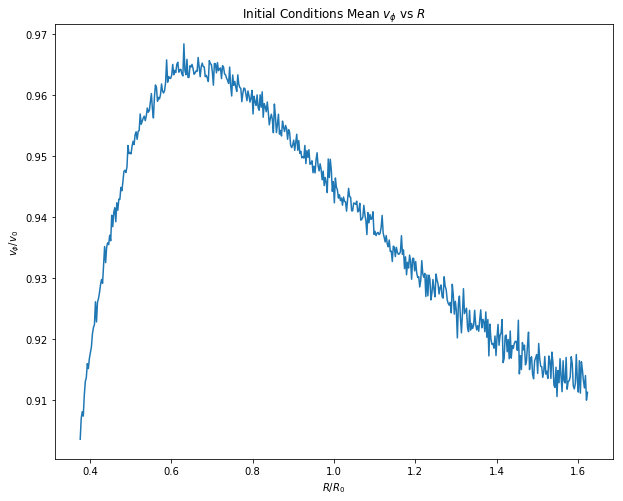

In [6]:
vT_bins1, R_edges1 = np.histogram(R[mask], bins=500, weights=vT[mask])
vT_mean_bins1 = vT_bins1/np.histogram(R[mask], bins=500)[0]
R_centres1 = (R_edges1[1:] + R_edges1[:-1])/2

plt.figure(figsize=(10,8))
plt.plot(R_centres1, vT_mean_bins1)
plt.title("Initial Conditions Mean $v_{\phi}$ vs $R$")
plt.xlabel('$R/R_0$')
plt.ylabel('$v_{\phi}/v_0$')
plt.show()

In [7]:
del R, vR, vT, z, vz, phi

In [8]:
filename = os.path.expandvars("$SCRATCH/data/structureless/03-new-7Gyr/new-7Gyr_0.fits")
data = Table.read(filename, format='fits')

In [9]:
R, vR, vT, z, vz, phi = data['R', 'vR', 'vT', 'z', 'vz', 'phi'].as_array().view((np.float64, 6)).T
phi[phi > np.pi] -= 2*np.pi
del data

In [10]:
mask = (R > 3/8.) & (R < 13/8.) & (phi > -np.pi/18) & (phi < np.pi/18) & (vT > 0.1) & (vT < 1.7)
H2, xedges2, yedges2 = np.histogram2d(R[mask], vT[mask], bins=(xedges1, yedges1))
H2 = H2.T

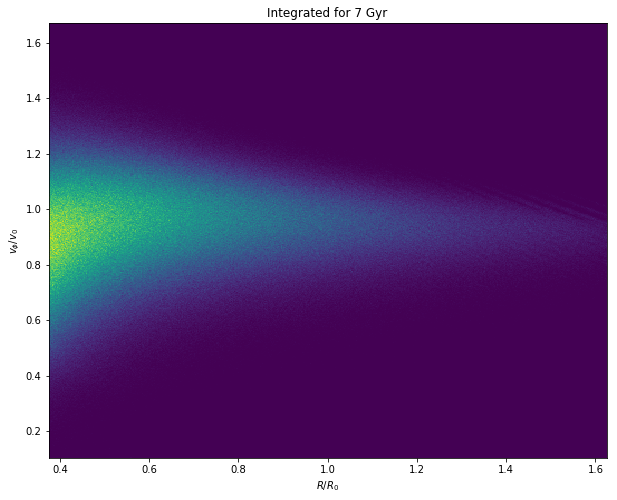

In [11]:
plt.figure(figsize=(10,8))
plt.imshow(H2, origin='low', extent=[xedges2[0], xedges2[-1], yedges2[0], yedges2[-1]], aspect='auto')
plt.xlabel('$R/R_0$')
plt.ylabel('$v_{\phi}/v_0$')
plt.title('Integrated for 7 Gyr')
plt.show()

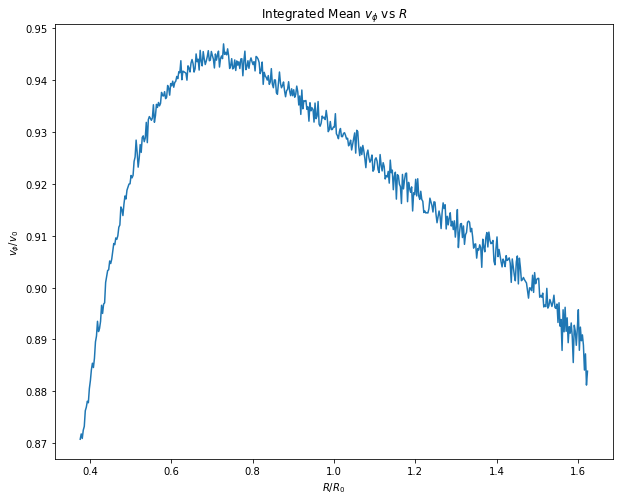

In [12]:
vT_bins2, R_edges2 = np.histogram(R[mask], bins=500, weights=vT[mask])
vT_mean_bins2 = vT_bins2/np.histogram(R[mask], bins=500)[0]
R_centres2 = (R_edges2[1:] + R_edges2[:-1])/2

plt.figure(figsize=(10,8))
plt.plot(R_centres2, vT_mean_bins2)
plt.title("Integrated Mean $v_{\phi}$ vs $R$")
plt.xlabel('$R/R_0$')
plt.ylabel('$v_{\phi}/v_0$')
plt.show()

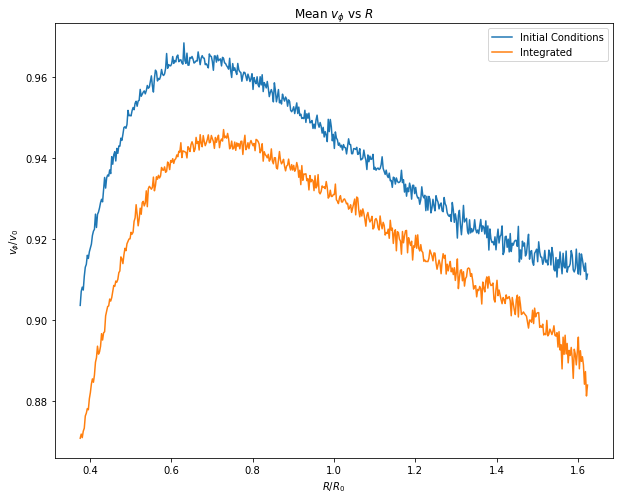

In [13]:
plt.figure(figsize=(10,8))
plt.plot(R_centres1, vT_mean_bins1, label="Initial Conditions")
plt.plot(R_centres2, vT_mean_bins2, label="Integrated")
plt.title("Mean $v_{\phi}$ vs $R$")
plt.xlabel('$R/R_0$')
plt.ylabel('$v_{\phi}/v_0$')
plt.legend()
plt.show()

In [14]:
H3 = H2/H1

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


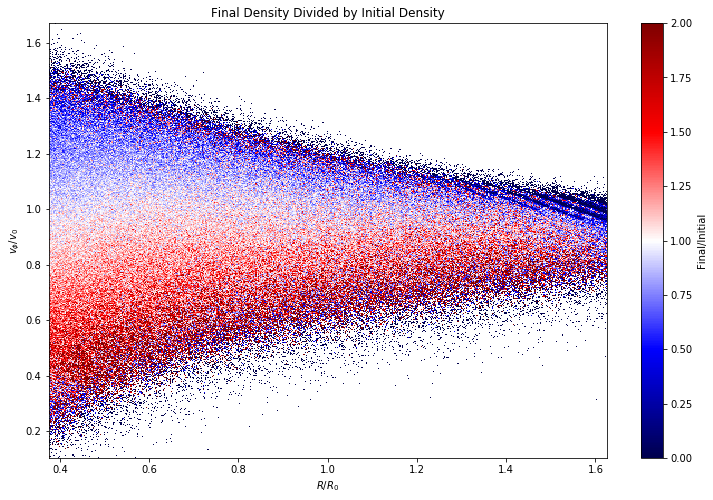

In [15]:
plt.figure(figsize=(12.5,8))
plt.imshow(H3, origin='low', extent=[xedges2[0], xedges2[-1], yedges2[0], yedges2[-1]], aspect='auto', cmap='seismic',
          vmin = 0, vmax = 2)
plt.xlabel('$R/R_0$')
plt.ylabel('$v_{\phi}/v_0$')
plt.title('Final Density Divided by Initial Density')
plt.colorbar(label='Final/Initial')
plt.show()

In [16]:
M = np.nanmax(H1, axis=0)
m = np.nanmin(H1, axis=0)
H1_normed = (H1 - m.T) / (M - m)

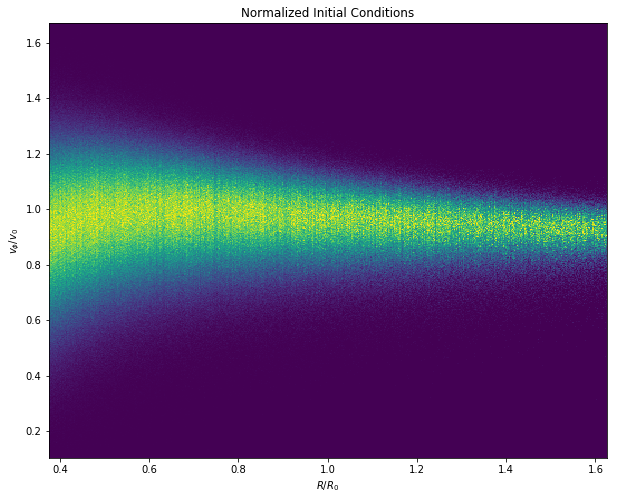

In [17]:
plt.figure(figsize=(10,8))
plt.imshow(H1_normed, origin='low', extent=[xedges1[0], xedges1[-1], yedges1[0], yedges1[-1]], aspect='auto')
plt.xlabel('$R/R_0$')
plt.ylabel('$v_{\phi}/v_0$')
plt.title('Normalized Initial Conditions')
plt.show()

In [18]:
M = np.nanmax(H2, axis=0)
m = np.nanmin(H2, axis=0)
H2_normed = (H2 - m.T) / (M - m)

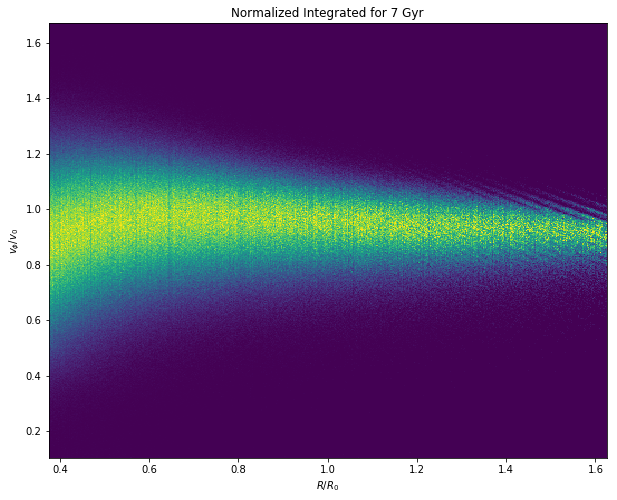

In [19]:
plt.figure(figsize=(10,8))
plt.imshow(H2_normed, origin='low', extent=[xedges2[0], xedges2[-1], yedges2[0], yedges2[-1]], aspect='auto')
plt.xlabel('$R/R_0$')
plt.ylabel('$v_{\phi}/v_0$')
plt.title('Normalized Integrated for 7 Gyr')
plt.show()

In [20]:
H3_normed = H2_normed/H1_normed

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


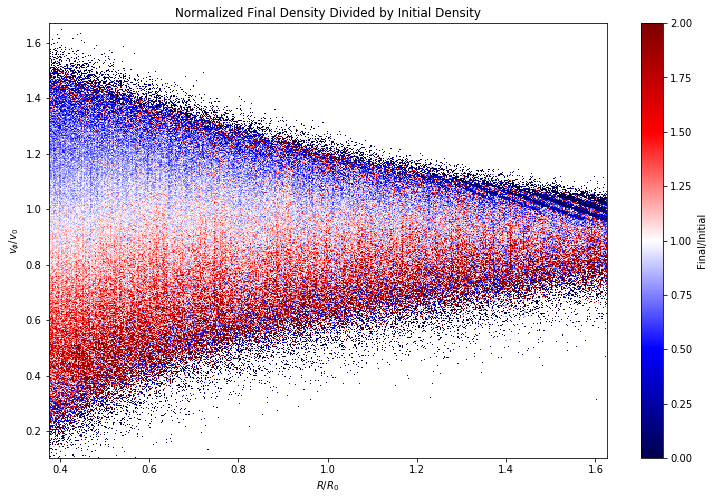

In [21]:
plt.figure(figsize=(12.5,8))
plt.imshow(H3_normed, origin='low', extent=[xedges2[0], xedges2[-1], yedges2[0], yedges2[-1]], aspect='auto', cmap='seismic',
          vmin = 0, vmax = 2)
plt.xlabel('$R/R_0$')
plt.ylabel('$v_{\phi}/v_0$')
plt.title('Normalized Final Density Divided by Initial Density')
plt.colorbar(label='Final/Initial')
plt.show()